# 1. Load dataset and preprocessing

In [6]:
import pandas as pd
data= pd.read_csv(r"titanic-passengers.csv",sep=";")

#Preprocessing our data
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
data['Cabin']=data.Cabin.fillna('G6')
data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


# 2. Apply decision tree 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [33]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","PassengerId"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
dec_tree = tree.DecisionTreeClassifier()  
dec_tree.fit(x_train, y_train)   #fitting our model
y_pred=dec_tree.predict(x_test)   # evaluating our model
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


# 3. Plot a decision tree

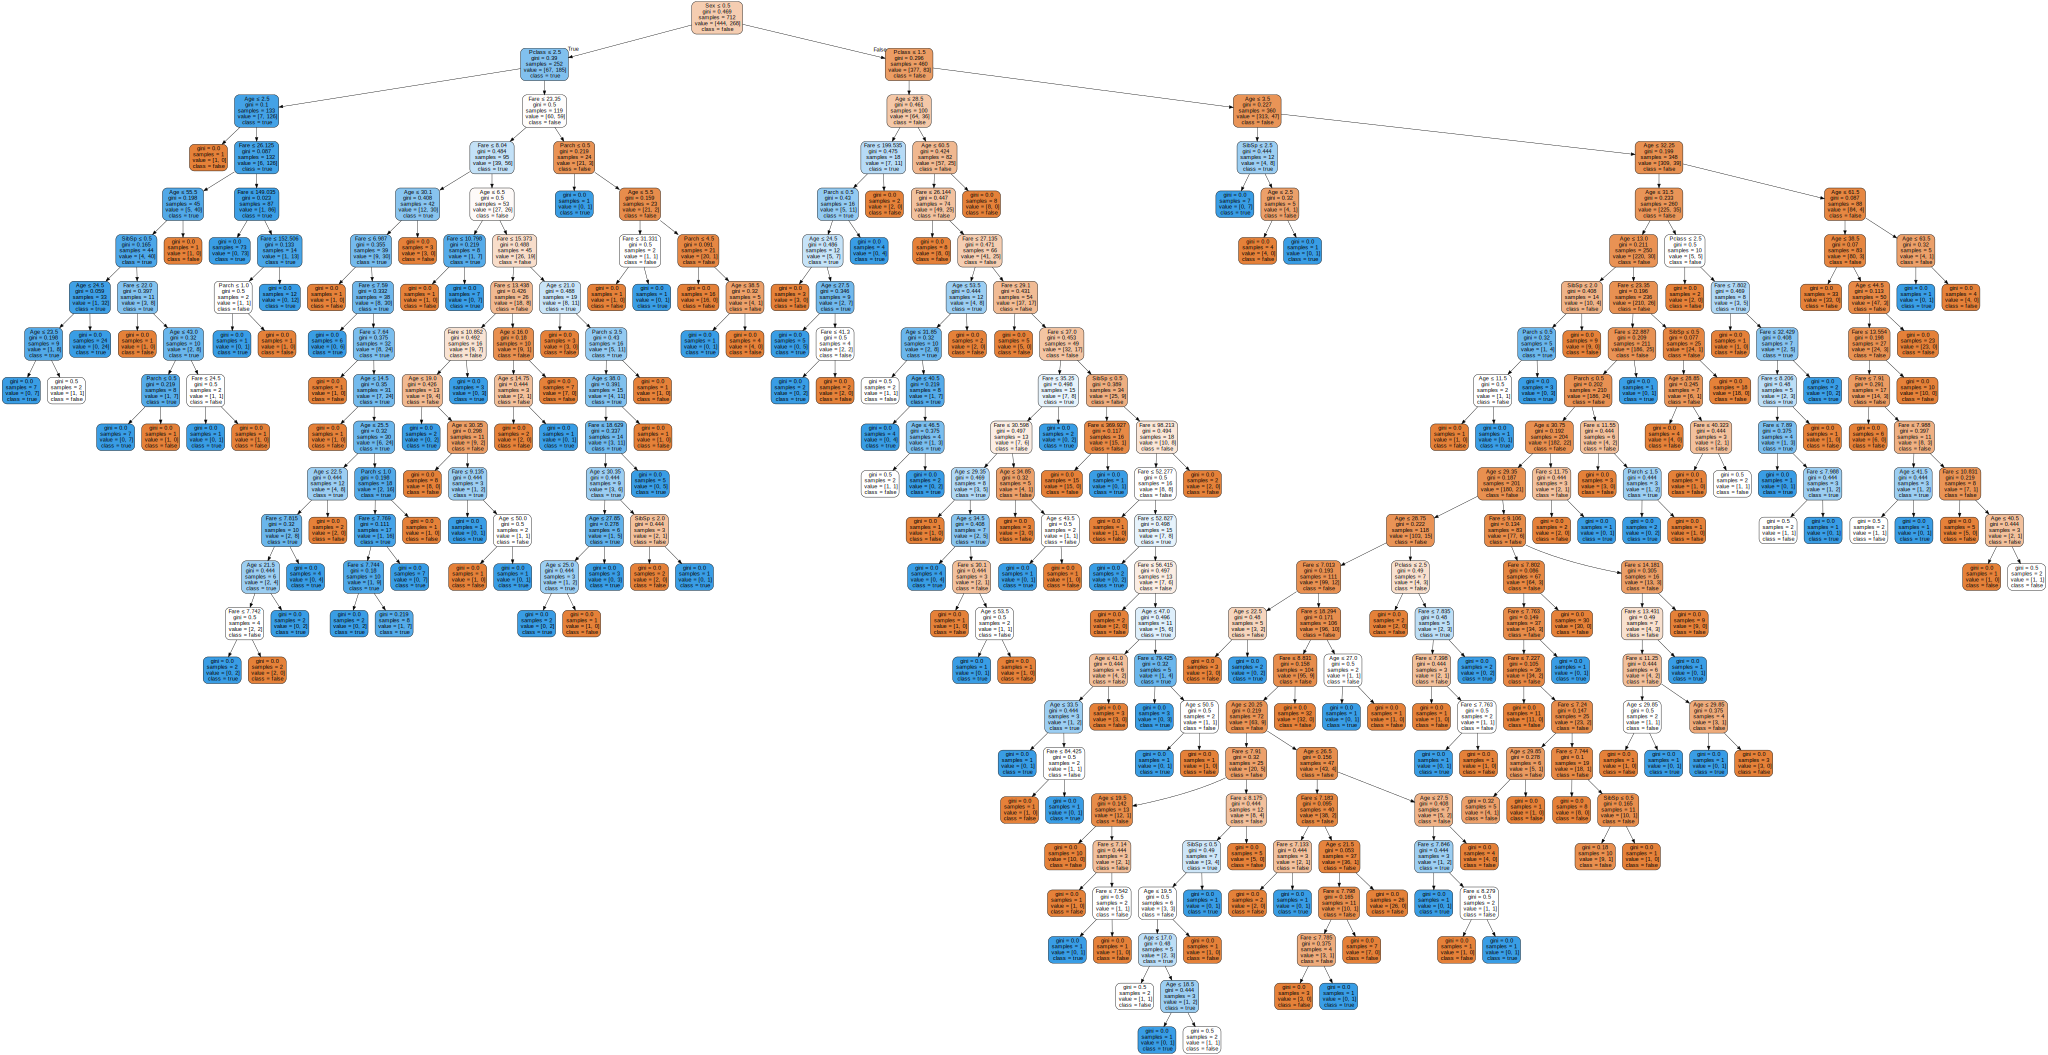

In [35]:
import graphviz
fn=["Pclass","Sex","Age","SibSp","Parch","Fare"]
cn=["false","true"]
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                      feature_names=fn,  
                      class_names=cn,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render()#generate pdf
graph

# 4. changing decison tree parameters 

the previous decision tree is two long, I will try to see if changing criterion and max_depth parameters will affect the accurancy and try to generate a shorter graph ( by reducing the max_depth value)

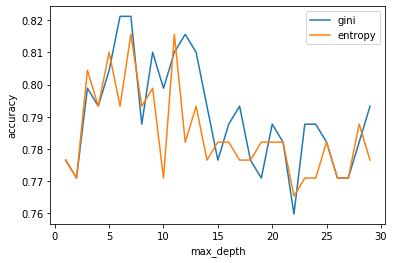

In [39]:
import matplotlib.pyplot as plt
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion="gini", max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(accuracy_score(y_test, pred))
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    max_depth.append(i)
d = pd.DataFrame({"acc_gini":pd.Series(acc_gini), 
 "acc_entropy":pd.Series(acc_entropy),
 "max_depth":pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot("max_depth","acc_gini", data=d, label="gini")
plt.plot("max_depth","acc_entropy", data=d, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

gini methode gives better accuracy than entropy and max_depth impact negatively the accuracy. we can observe that the best accuracy is registred for gini method with max_depth value between 5 and 7

## 5. Calculate accuracy with  gini creterion and max_depth=6

In [49]:

dec_tree = tree.DecisionTreeClassifier(criterion = "gini", max_depth=6)
dec_tree.fit(x_train, y_train)   #fitting our model
y_pred=dec_tree.predict(x_test)   # evaluating our model
print("Accuracy 2:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


# 6. Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier 

clf=RandomForestClassifier(n_estimators=100)  
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy  random forest:", accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy  random forest: 0.8324022346368715


# 7. change n_estimators value

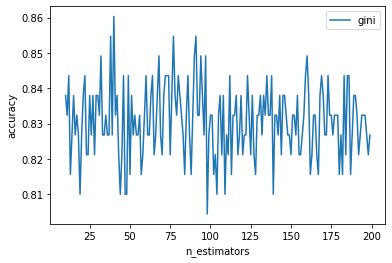

In [63]:
nb_trees = []
acc = []
for i in range(10,200):
    clf1=RandomForestClassifier(n_estimators=100)  
    clf1.fit(x_train, y_train) 
    y_pred1=clf1.predict(x_test) 
    acc.append(accuracy_score(y_test,y_pred1))
    nb_trees.append(i)
d = pd.DataFrame({"accuracy":pd.Series(acc), 
 "n_estimators":pd.Series(nb_trees)})
# visualizing changes in parameters
plt.plot("n_estimators","accuracy", data=d, label="gini")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

### we can observe that changing n_estimators doesn't have a real impact into accuracy. so for n_estimators values from 10 to 200, the accuracy value vary from 0.80 to 0.86

In [72]:
from sklearn.ensemble import RandomForestClassifier 

clf=RandomForestClassifier(n_estimators=42)  
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy  random forest 2:", accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy  random forest 2: 0.8379888268156425
